# US Polling Places 2012-2020

## Librarires

In [1]:
import ibis
import ibis.selectors as s
from ibis import _

## Load data

In [2]:
dfr = ibis.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-16/polling_places.csv")

In [3]:
dfr.head(3)

r0 := DatabaseTable: ibis_read_csv_ivxomjxqn5dfdgqu4zv3wm2nue
  election_date     date
  state             string
  county_name       string
  jurisdiction      string
  jurisdiction_type string
  precinct_id       string
  precinct_name     string
  polling_place_id  string
  location_type     string
  name              string
  address           string
  notes             string
  source            string
  source_date       date
  source_notes      string

Limit[r0, n=3]

**The interactive option give  a nice printing/view**

In [4]:
ibis.options.interactive = True

In [5]:
dfr.head(3)

┏━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ election_date ┃ state  ┃ county_name ┃ jurisdiction ┃ jurisdiction_type ┃ precinct_id ┃ precinct_name                ┃ polling_place_id ┃ location_type ┃ name                         ┃ address                                   ┃ notes  ┃ source ┃ source_date ┃ source_notes ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ date          │ string │ string      │ string       │ string            │ string      │ string                       │ string           │ string        │ string                       │ string                                    │ string │ string │ date        │ string       │
├───────────────┼────────┼─────────────┼──────────────┼───────────────────┼─────────────┼──────────────────────────────┼──────────────────┼───────────────┼──────────────────────────────┼───────────────────────────────────────────┼────────┼────────┼─────────────┼──────────────┤
│ 2020-11-03    │ AL     │ AUTAUGA     │ AUTAUGA      │ county            │ NA          │ AUTAUGAVILLE VOL FIRE DEPT   │ NA               │ election_day  │ AUTAUGAVILLE VOL FIRE DEPT   │ 2610 HIGHWAY 14 W, AUTAUGAVILLE, AL 36003 │ NA     │ ORR    │ 2020-10-21  │ NA           │
│ 2020-11-03    │ AL     │ AUTAUGA     │ AUTAUGA      │ county            │ NA          │ BILLINGSLEY COMMUNITY CENTER │ NA               │ election_day  │ BILLINGSLEY COMMUNITY CENTER │ 2159 COUNTY RD 37, BILLINGSLEY, AL 36006  │ NA     │ ORR    │ 2020-10-21  │ NA           │
│ 2020-11-03    │ AL     │ AUTAUGA     │ AUTAUGA      │ county            │ NA          │ BOONE'S CHAPEL               │ NA               │ election_day  │ BOONE'S CHAPEL               │ 2301 COUNTY RD 66, PRATTVILLE, AL 36067   │ NA     │ ORR    │ 2020-10-21  │ NA           │
└───────────────┴────────┴─────────────┴──────────────┴───────────────────┴─────────────┴──────────────────────────────┴──────────────────┴───────────────┴──────────────────────────────┴───────────────────────────────────────────┴────────┴────────┴─────────────┴──────────────┘

In [8]:
dfr.schema() #dtypes

ibis.Schema {
  election_date      date
  state              string
  county_name        string
  jurisdiction       string
  jurisdiction_type  string
  precinct_id        string
  precinct_name      string
  polling_place_id   string
  location_type      string
  name               string
  address            string
  notes              string
  source             string
  source_date        date
  source_notes       string
}

In [9]:
dfr.count()

461445

In [10]:
len(dfr.schema())

15

## Wrangling

In [11]:
dfr.jurisdiction_type.value_counts()

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ jurisdiction_type   ┃ jurisdiction_type_count ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ string              │ int64                   │
├─────────────────────┼─────────────────────────┤
│ parish              │                   20039 │
│ town                │                    3135 │
│ city                │                   13499 │
│ county_municipality │                   27152 │
│ borough             │                    2025 │
│ NA                  │                      60 │
│ municipality        │                   44829 │
│ county              │                  350706 │
└─────────────────────┴─────────────────────────┘

In [12]:
dfr.location_type.value_counts()

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ location_type    ┃ location_type_count ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ string           │ int64               │
├──────────────────┼─────────────────────┤
│ early_vote_site  │                1778 │
│ vote_center      │                5566 │
│ polling_location │              100833 │
│ early_vote       │                1291 │
│ polling_place    │              103737 │
│ NA               │              192830 │
│ election_day     │               55410 │
└──────────────────┴─────────────────────┘

In [22]:
df = dfr.filter(
    [_.jurisdiction_type != 'NA', _.location_type != "NA"]
).select(
    _.state,  "jurisdiction", s.endswith("type"),  s.contains("date")
).rename(
    type = "jurisdiction_type",
    location = "location_type",
    date = "source_date",
    election = "election_date"
)

In [23]:
df.limit(4)

┏━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ state  ┃ jurisdiction ┃ type   ┃ location     ┃ election   ┃ date       ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ string │ string       │ string │ string       │ date       │ date       │
├────────┼──────────────┼────────┼──────────────┼────────────┼────────────┤
│ AL     │ AUTAUGA      │ county │ election_day │ 2020-11-03 │ 2020-10-21 │
│ AL     │ AUTAUGA      │ county │ election_day │ 2020-11-03 │ 2020-10-21 │
│ AL     │ AUTAUGA      │ county │ election_day │ 2020-11-03 │ 2020-10-21 │
│ AL     │ AUTAUGA      │ county │ election_day │ 2020-11-03 │ 2020-10-21 │
└────────┴──────────────┴────────┴──────────────┴────────────┴────────────┘

In [37]:
byloc = df.location.value_counts().order_by(_.location_count).rename(total = "location_count")
byloc

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ location         ┃ total  ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ string           │ int64  │
├──────────────────┼────────┤
│ early_vote       │   1291 │
│ early_vote_site  │   1778 │
│ vote_center      │   5566 │
│ election_day     │  55410 │
│ polling_location │ 100833 │
│ polling_place    │ 103737 │
└──────────────────┴────────┘

In [33]:
#bytype = df.type.value_counts().order_by(_.type_count).rename(total = "type_count")
bytype = (
    df.group_by("type")
    .aggregate(total=ibis._.count())
    .order_by(ibis.desc("total"))
)
bytype

┏━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ type         ┃ total  ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━┩
│ string       │ int64  │
├──────────────┼────────┤
│ county       │ 207112 │
│ municipality │  22805 │
│ parish       │  20039 │
│ city         │  13499 │
│ town         │   3135 │
│ borough      │   2025 │
└──────────────┴────────┘

## Plotting

In [40]:
width = 640
height = 480

### Altair

In [32]:
import altair as alt

In [45]:
chart = (
    alt.Chart(
        byloc.to_pandas(),
        title=alt.Title(
       "US POLLING DISTRIBUTION",
       subtitle="By Locatation Type"))
    .mark_bar()
    .encode(
        alt.X("location").axis(title="Location"),
        y="total",
        tooltip=["location", "total"],
    )
    .properties(width=width, height=height)
    .interactive()
)
chart

alt.Chart(...)

### Seaborn

In [38]:
import seaborn as sns

Text(0, 0.5, 'Frequency')

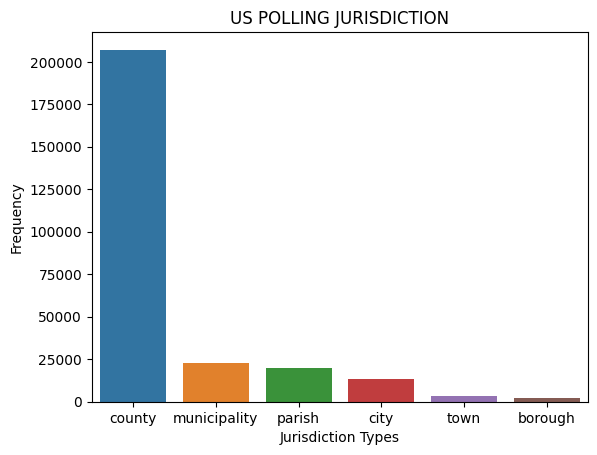

In [48]:
chart = sns.barplot(
    data=bytype.to_pandas(),
    x="type",
    y="total",
    hue="type"
)
chart.figure.set_size_inches(width / 100, height / 100)
chart.set_title("US POLLING JURISDICTION")
chart.set_xlabel('Jurisdiction Types')
chart.set_ylabel('Frequency')